# Face Detection - Cartoony Face
## This notebook outlines the concepts behind the face detection in images and videos.
## Detects the face and replaces it by a cartoon

**Object detection** is a vital task in image processing and computer vision. It is concerned with detecting instances of an object such as human faces, buildings, trees, cars, etc

The primary aim of **face detection algorithms** is to determine whether there is any face in an image or not

#### Main steps
- Selecting Haar-like features
- Creating an integral image
- Running AdaBoost training
- Creating classifier cascades

## TASK: Detect faces in video feed from live webcam

### Steps
- Import the libraries
- Collect pre-trained HAAR Cascade filters (xml)
- Create a Cascade Classifier with those filters
- Capture video feed from webcam
- Display the video frame
- Convert the RGB frame into GrayScale
- Detect faces with the Cascade Classifier
- Find Face (Region of Interest)
- Draw rectangle around face
- Detect eyes with the Eyes Cascade classifier
- Draw circles for detected eyes
- Show the detected face region with detected eyes

### Import the libraries

In [1]:
import cv2
import os
import numpy as np
import warnings
import matplotlib.pyplot as plt
warnings.filterwarnings('ignore')
%matplotlib inline

In [2]:
# Function to display images in Jupyter Notebooks and Google Colab
def plt_imshow(title, image):
    
    # convert the image frame BGR to RGB color space and display it
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    plt.imshow(image)
    plt.title(title)
    plt.grid(False)
    plt.show()

In [3]:
# # construct the argument parser and parse the arguments
# ap = argparse.ArgumentParser()
# ap.add_argument("-i", "--image", type=str, required=True,
# help="path to input image")
# args = vars(ap.parse_args())

# since we are using Jupyter Notebooks we can replace our argument
# parsing code with *hard coded* arguments and values
args = {
    "image": "iron-man2.jpg"
}

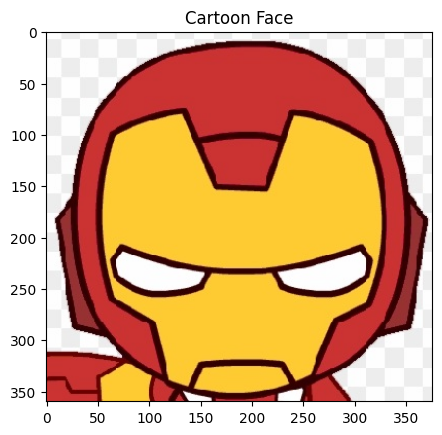

In [4]:
# load the image and display it
image = cv2.imread(args["image"])
plt_imshow("Cartoon Face", image)

### Collect HAAR Cascade filters

In [5]:
cascPathface = os.path.dirname(
    cv2.__file__) + "/data/haarcascade_frontalface_alt2.xml"

In [6]:
cascPathface

'C:\\Users\\jlira\\AppData\\Roaming\\Python\\Python38\\site-packages\\cv2/data/haarcascade_frontalface_alt2.xml'

### Create Cascade Classifiers
- Face
- Eyes

In [7]:
faceCascade = cv2.CascadeClassifier(cascPathface)

### Capture Video feed from webcam

In [8]:
video_capture = cv2.VideoCapture(0)

### Resizing Cartoon Face

In [9]:
def resize_cartoon_face(image, faceROI):
    # resize cartoon face to match size of detected face in video

    inter = cv2.INTER_AREA
    r = faceROI.shape[0]/image.shape[0]
    dim  = (int(faceROI.shape[0]),int(image.shape[0]*r))
    return cv2.resize(image, dim, interpolation = inter)

### Replacing Face in Frame

In [10]:
def replace_face_in_frame (frame, x0, y0, cartoon_image):
    frame[y0:y0+cartoon_image.shape[0], x0:x0+cartoon_image.shape[1]] = cartoon_image
    return frame
    
    

### Putting it all together

In [11]:
# We need to set resolutions. So, convert them from float to integer.
frame_width = int(video_capture.get(3))
frame_height = int(video_capture.get(4))
size = (frame_width, frame_height)
# Below VideoWriter object will create a frame of above defined The output is stored in 'filename.avi' file.
result = cv2.VideoWriter('cartooney_face.avi', 
                         fourcc=cv2.VideoWriter_fourcc(*'MJPG'),
                         fps=10, 
                         frameSize=size)
while True:
    # Capture frame-by-frame
    ret, frame = video_capture.read()
    gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
    faces = faceCascade.detectMultiScale(gray,
                                         scaleFactor=1.1,
                                         minNeighbors=5,
                                         minSize=(60, 60),
                                         flags=cv2.CASCADE_SCALE_IMAGE)
    for (x,y,w,h) in faces:
        cv2.rectangle(frame, (x, y), (x + w, y + h),(255, 255, 0), 2)
        faceROI = frame[y:y+h,x:x+w]
        # resize cartoon face to match size of detected face in video
        cartoon_image = resize_cartoon_face(image, faceROI)
        frame = replace_face_in_frame (frame, x, y, cartoon_image)

    # Write the frame into the file 'filename.avi'
    result.write(frame)
   
    # Display the resulting frame
    cv2.imshow('Face Video', frame)

    if cv2.waitKey(1) & 0xFF == ord('q'):
        break
video_capture.release()
cv2.destroyAllWindows()
print("The video was successfully saved")

The video was successfully saved


In [12]:
video_capture.release()
cv2.destroyAllWindows()